# 1. Camera Calibration

This script intends to find the corners of the checkerboard using the OpenCv method findChessboardCorners.\
We also create 3D points to correspond to the 2D points from the chessboard.

**Import the libraries**

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp


## Finding the corner of the checkerboard

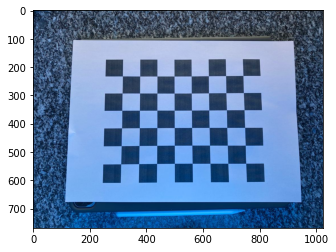

In [2]:
#Import the image
img = cv2.imread("images/Chessboard_real_1.jpeg")
# convert it to gray scale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

plt.imshow(img)

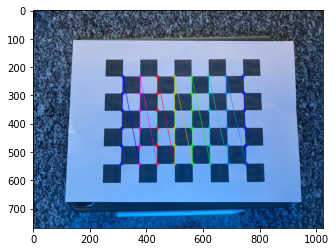

In [4]:
# stop the iteration when specified
# accuracy, epsilon, is reached or
# specified number of iterations are completed.
criteria = (cv2.TERM_CRITERIA_EPS +
            cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Checkerboard patern size
patternsize = (6,8)


# Vector for 3D points
threedpoints = []
 
# Vector for 2D points
twodpoints = []

#3D points real world coordinates
objectp3d = np.zeros((1, patternsize[0]* patternsize[1],3), np.float32)
objectp3d[0, :, :2] = np.mgrid[0:patternsize[0], 0:patternsize[1]].T.reshape(-1, 2)
prev_img_shape = None

#print(objectp3d)

# detect corners
retval, corners= cv2.findChessboardCorners(gray,patternsize,cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK +cv2.CALIB_CB_NORMALIZE_IMAGE)

#print(corners)
if(retval == True):
    threedpoints.append(objectp3d)

    # Refining pixel coordinates or given 2d points.
    corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria).reshape(48,2)
    
    twodpoints.append(corners2)
    # Draw and display the corners
    image = cv2.drawChessboardCorners(img,patternsize,corners2,retval)
    #cv2.circle(image,)

    plt.imshow(image)
    plt.show()
    